# Case Study: Scraping Reddit with Pushshift

This lesson will walk you through the basics of scraping Reddit data using the popular Pushshift API.  We'll discuss some of the most useful parameters at our disposal, then work our way through a number of exercises putting those parameters to use.  Finally, we'll have some fun visualizing patterns in Reddit content. 

## Reddit

[Reddit](https://www.reddit.com/) provides an additional avenue for large-scale digital data collection and analysis.


Notably, Reddit allows its users, known as Redditors, to create and maintain communities, or "subreddits," within the larger Reddit platform.  Redditors can opt in or out of a wide variety of communities at any time, allowing them to personalize their feeds and engage with a uniquely tailored online social circle. 

## Pushshift

Per the [subreddit](https://www.reddit.com/r/pushshift/comments/bcxguf/new_to_pushshift_read_this_faq/) dedicated to its discussion, pushshift.io allows users to analyze and aggregate large volumes of data from Reddit, while also providing the option to specify the desired ranges time from which to collect data.  


### Setup

As in the previous chapter discussing more general web scraping through APIs, we'll be importing both `requests` and `pandas`.  

Additionally, we'll want to import `time`, `datetime`, and `sleep` to assist us with looping requests through time, and `matlibplot inline` to help with visualizing our scraped data. 

In [67]:
import requests
import pandas as pd
import time
from datetime import datetime
from time import sleep
%matplotlib inline

We'll also want to save our base URL as a string for later use.  When using Pushshift, we'll have to indicate whether we want to scrape submissions or comments in our request within the base URL. To scrape submissions, the base URL should end with `/submission/`. To scrape comments, the base URL should end with `/comment/`.  So, if we want to request submissions we'd set our base URL as the following: 

In [17]:
base_url = 'https://api.pushshift.io/reddit/search/submission/'

### Parameters

We'll now discuss a number of the parameters available through Pushshift. You can find a full list of parameters available through the API [here](https://pushshift.io/api-parameters/).  We'll return to some of the parameters listed at the link provided later on in the chapter, when we begin analyzing some scraped Reddit content. 

- **sort**: Allows you to control the direction in which you scrape results. Results can be scraped in ascending ('asc') or descending ('desc') order. 


> - **sort_type**: Allows you to set the parameter used to sort requests. 


- **created_utc**: This parameter is useful for restricting requests by the Coordinated Universal Time, or UTC, of their creation.  There are a number of online conversion tools available for converting human-readable dates to UTCs; I typically use [this one](https://www.epochconverter.com/).


> - **before**: Use this to scrape content created *before* a certain UTC.
- **after**: Use this to scrape content created *after* a certain UTC.


- **size**: Allows you to set a maximum size limit on your request.  Without looping requests, size per request maxes out at 1,000 submissions or comments.


- **author**: Allows you to request only the content produced by a single Redditor, or a specific set of Redditors.


- **subreddit**: Allows you to request only the content from a single subreddit, or a specific set of subreddits.


- **score**: Allows you to sort or otherwise restrict requests depending on the net number of likes versus dislikes received by content.


- **num_comments**: Allows you to sort or otherwise restrict requests depending on the total number of comments on submissions. 


### Pushshift Exercise 1: Making a Request

Using the API Documentation outlined above as a guide, let's use pushshift to scrape some Reddit content.  We'll start by looking at some submissions from [r/changemyview](https://www.reddit.com/r/changemyview/), which describes itself as "a place to post an opinion you accept may be flawed, in an effort to understand other perspectives on the issue."


Let's look at the 50 submissions to r/changemyview from 2019 that received the highest number of comments. We can start by setting the parameters for our request in a dictionary: 

In [14]:
parameters = {'subreddit' : 'changemyview',
              'sort'       : 'desc',
              'sort_type'  : 'num_comments',
              'after'       : '1546300800',
              'before'       : '1577836800',
              'size'       : 50,}     

Now we're ready to make our request to the API.

In [15]:
r = requests.get(base_url, params = parameters)

We'll want to store the data scraped in the request in JSON format, so we can access it within the notebook as a dataframe. 

In [11]:
df = pd.DataFrame(r.json()['data'])

Try looking at a random sample of 10 submissions from the request as a dataframe in the cell below.

In [19]:
df.sample(10)

,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_text_color,author_flair_type,author_fullname,author_patreon_flair,can_mod_post,...,allow_live_comments,awarders,steward_reports,total_awards_received,author_premium,og_description,og_title,gilded,post_hint,preview
26,kinglax,NaN,None,[],None,NaN,text,t2_5lo3i,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
13,GAMpro,NaN,None,[],None,NaN,text,t2_ysnrw,False,False,...,False,[],[],0.0,NaN,NaN,NaN,NaN,self,"{'enabled': False, 'images': [{'id': 'C9KSOp_b..."
48,juul_pod,NaN,None,[],None,NaN,text,t2_174yan,False,False,...,False,[],[],0.0,False,NaN,NaN,NaN,NaN,NaN
5,RedUlster,NaN,None,[],None,NaN,text,t2_4hnldl0n,False,False,...,False,[],[],0.0,NaN,,,NaN,NaN,NaN
47,gucci_sweatbands,NaN,None,[],None,NaN,text,t2_1m2qo0k9,False,False,...,False,NaN,NaN,0.0,NaN,NaN,NaN,2.0,NaN,NaN
45,lawtonj,,None,[],7∆,dark,text,t2_n3v7d,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
34,Hey-I-Read-It,NaN,None,[],None,NaN,text,t2_23pcrwbr,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,Highlyemployable,NaN,None,[],None,NaN,text,t2_4p7iimbi,False,False,...,False,[],[],0.0,NaN,,,1.0,NaN,NaN
49,Caesaroctopus,NaN,None,[],None,NaN,text,t2_prc43,False,False,...,False,[],[],0.0,False,NaN,NaN,NaN,NaN,NaN
33,Cadent_Knave,NaN,None,[],None,NaN,text,t2_iz35j,False,False,...,False,[],[],0.0,False,NaN,NaN,NaN,NaN,NaN


There's a lot of information available!  It will be useful to determine a list of keys in the JSON file we'd like to look at, so we're not bombarded with too much information at one time.   

In [12]:
df.keys()

Index(['author', 'author_flair_background_color', 'author_flair_css_class',
       'author_flair_richtext', 'author_flair_text', 'author_flair_text_color',
       'author_flair_type', 'author_fullname', 'author_patreon_flair',
       'can_mod_post', 'contest_mode', 'created_utc', 'domain', 'full_link',
       'gildings', 'id', 'is_crosspostable', 'is_meta', 'is_original_content',
       'is_reddit_media_domain', 'is_robot_indexable', 'is_self', 'is_video',
       'link_flair_background_color', 'link_flair_richtext',
       'link_flair_text_color', 'link_flair_type', 'locked', 'media_only',
       'no_follow', 'num_comments', 'num_crossposts', 'over_18',
       'parent_whitelist_status', 'permalink', 'pinned', 'pwls',
       'retrieved_on', 'score', 'selftext', 'send_replies', 'spoiler',
       'stickied', 'subreddit', 'subreddit_id', 'subreddit_subscribers',
       'subreddit_type', 'suggested_sort', 'thumbnail', 'title', 'updated_utc',
       'url', 'whitelist_status', 'wls', 'all_awa

Some of these keys (for example,`author`, `created_utc`, `num_comments`, and `score`) were outlined in the API definitions above, but a few of the keys are new.  Here are a couple of important keys we haven't yet discussed:

- **title**: This is the title a Redditor has given their submission.  


- **selftext**: This is the text contained within the submission itself. While a submission will always contain some text in the `title`, some image-only submissions will not contain any `selftext`. 

To get a better handle of the data we've scraped, let's narrow our focus to `author`, `num_comments`, `score`, `title`, and `selftext`.

In [27]:
columns_to_keep = ['author', 'num_comments', 'score', 'title', 'selftext']

Now, let's pull another random sample of 10 submissions from the dataframe using our narrowed set of parameters. 

In [9]:
df[columns_to_keep].sample(10)

,author,num_comments,score,title,selftext
15,Birb-Brain-Syn,1468,3491,CMV: Anyone working a full-time job should be ...,So for me the above held opinion is straight-f...
0,Amiller1776,2617,1337,CMV: Trans activists who claim it is transphob...,Several trans activist youtubers have posted v...
42,BasicRedditor1997,1100,1,CMV:Making children pledge allegiance to the f...,Every day from Kindergarten through 12th grade...
41,mandi4910,1112,3046,CMV: Transgender women shouldn't be allowed to...,"Ok first of all i really, really feel like a j..."
30,psychoIogic,1254,1696,CMV: Circumcision of babies should be illegal ...,Some people believe there are benefits that wa...
9,Akukurotenshi,1783,1847,CMV: Eating dogs is not wrong,You always see people demeaning those who have...
20,Insert_Alias_Heree,1377,2274,"CMV: Those born in poor economic backgrounds, ...",With the increasing amount of Republican actio...
11,killgoresalmonman,1660,3262,CMV: There’s no fact or logic based reason to ...,The science is clear that climate change is re...
12,ThrowingThisAwayBtw,1594,1,CMV: Killing animals for pleasure is wrong,Hi all!\n\nI've recently been thinking a lot a...
6,carlsaganheaven,1877,3062,CMV: In heterosexual relationships the problem...,It's a common conception that when you marry a...


That's a bit easier to handle.  We can always add or take away keys as needed. 

### Pushshift Exercise 2: Looping Requests

You'll probably want to obtain more than fifty submissions and/or comments when conducting your own research projects. While you can obtain up to 1,000 submissions or comments per Pushshift request, most data analysis will require you to collect far more content. With that in mind, we'll now cover how we can loop requests using the Pushshift API. 


In this second exercise, we'll continue looking at r/changemyview.  This time, however, we'll attempt to collect *all* comments from the subreddit posted in the first week of 2019. 


We can get started by setting the first and last UTCs we'll be making requests from. Since we're looking at all comments from the first week of 2019, that makes our first UTC the beginning of the year, and the last UTC the end of the day of January 7th, 2019. 

In [14]:
# UTC for 1/01/2019, 12:00:00 AM GMT

min_utc = 1546300800

# UTC for 1/07/2019, 11:59:59 PM GMT

last_utc = 1546905599

Now we'll want to define a function that allows us to collect a batch of 1,000 comments from r/changemyview. To get started, let's revise the base URL we defined earlier in the chapter so that Pushshift returns comments rather than submissions when we make our request. 

In [15]:
base_url = 'https://api.pushshift.io/reddit/search/comment/'

Next, we can define the parameters in place for each batch of comments we collect. In this exercise, we'll begin requests are the start of 2019 and work our way to the end of the first week. We'll initially set up our parameters for the first of several requests, such that we scrape the first 1,000 comments from r/changmyview in the year of 2019.

In [28]:
  parameters = {'subreddit' : 'changemyview',
                'after'    : min_utc,
              'sort'       : 'asc',
              'sort_type'  : 'created_utc',
              'size'       : 1000,}

Because there have almost certainly been more than 1,000 comments posted to r/changemyview over the course of the first week of 2019, we'll need to define a function that lets us update the `min_UTC` in our initial parameters. We'll accomplish this using the maximum UTC, or `max_UTC`, from the previous batch of comments. 

In [29]:
def find_max_utc(df):
  max_utc = df['created_utc'].values.max()
  return max_utc

**Note**: By toying with the parameters and using the same base URL, we can also define functions returning the first and last UTCs for comments on r/changemymind. While this is less relevant to the current exercise, it will come in handy if we ever want to scrape *all* data ever posted to a subreddit for in our future research.

In [30]:
def get_first_utc(subreddit):
  base_url =  'https://api.pushshift.io/reddit/search/comment/'

  parameters = {'subreddit' : 'changemyview',
              'sort'       : 'asc',
              'sort_type'  : 'created_utc',
              'size'       : 1,}
              
  df = requests.get(base_url, params = parameters)
  df = pd.DataFrame(df.json()['data'])

  return df['created_utc'].values.min()

In [31]:
def get_last_utc(subreddit):
  base_url =  'https://api.pushshift.io/reddit/search/comment/'

  parameters = {'subreddit' : 'changemyview',
              'sort'       : 'desc',
              'sort_type'  : 'created_utc',
              'size'       : 1,}
              
  df = requests.get(base_url, params = parameters)
  df = pd.DataFrame(df.json()['data'])
  return find_max_utc(df)

We're now ready to define our function to make a batch of requests. This is where we'll indicate we'd like to store scraped data in a JSON format using `pandas`.

In [32]:
def get_batch(subreddit, min_utc):
  base_url =  'https://api.pushshift.io/reddit/search/comment/'

  parameters = {'subreddit' : 'changemyview',
                'after'    : min_utc,
              'sort'       : 'asc',
              'sort_type'  : 'created_utc',
              'size'       : 1000,}

  r = requests.get(base_url, params = parameters)
  try:
    df = pd.DataFrame(r.json()['data'])
  except:
    print(r.text)
  return df

Altogether, our first set of defined functions should look like this: 

In [33]:
def find_max_utc(df):
    newest_utc = df['created_utc'].values.max()
    return newest_utc


def get_first_utc(subreddit):
    base_url =  'https://api.pushshift.io/reddit/search/comment/'

    parameters = {'subreddit' : 'changemyview',
                 'sort'       : 'asc',
                 'sort_type'  : 'created_utc',}
    return newest_utc


def get_first_utc(subreddit):
  base_url =  'https://api.pushshift.io/reddit/search/comment/'

  parameters = {'subreddit' : 'changemyview',
              'sort'       : 'asc',
              'sort_type'  : 'created_utc',
              'size'       : 1,}
              
  df = requests.get(base_url, params = parameters)
  df = pd.DataFrame(df.json()['data'])

  return df['created_utc'].values.min()


def get_last_utc(subreddit):
  base_url =  'https://api.pushshift.io/reddit/search/comment/'

  parameters = {'subreddit' : 'changemyview',
              'sort'       : 'desc',
              'sort_type'  : 'created_utc',
              'size'       : 1,}
              
  df = requests.get(base_url, params = parameters)
  df = pd.DataFrame(df.json()['data'])
  return find_max_utc(df)
 

def get_batch(subreddit, min_utc):
  base_url =  'https://api.pushshift.io/reddit/search/comment/'

  parameters = {'subreddit' : 'changemyview',
                'after'    : min_utc,
              'sort'       : 'asc',
              'sort_type'  : 'created_utc',
              'size'       : 1000,}

  r = requests.get(base_url, params = parameters)
  try:
    df = pd.DataFrame(r.json()['data'])
  except:
    print(r.text)
  return df


We can now walk through the how to define the function that will allow us to scrape all comments from r/changemyview during the first week of 2019.

Before we can begin finding maximum UTCs from previously requested batches of comments, we'll need to set a temporary starting UTC. For this exercise, the starting UTC will be the same as the first UTC. 

In [34]:
# UTC for 1/01/2019, 12:00:00 AM GMT

max_utc = 1546300800

In order to compile multiple batches of 1,000 comments into a list of dataframes, we'll also have to set up an empty list to hold all the batches we scrape.  

In [35]:
dfs = []

Now we want to set up the loop itself.  We can construct a `while` loop to move backward through time and collect concurrent batches until we've reached the final UTC from which we'd like to make requests.

We'll also want to make sure we append each batch of comments to our previously defined list as we move through the loop. 

In [ ]:
 while max_utc <= last_utc:

    df = get_batch(subreddit, max_utc)
 
    dfs.append(df)

We also need to use the previously defined `find_max_utc` function to allow our `while` loop to iteratively update the starting UTC as we request multiple batches. We can include an exception that allows us to concatenate the final batch of comments into our list of dataframes using the `concat` function from `pandas`.

In [ ]:
try:
    max_utc = find_max_utc(df)
except:
    print('error with max_utc')
    return pd.concat(dfs)

We'll want to use `sleep` to avoid overloading the server as we make multiple requests. 

In [ ]:
sleep(1)

We can also use `print` to view our loop function's progress in real time, and to ensure the function works. Importing `datetime` also lets us convert UTCs from the API into human readable dates, so that we can easily interpret feedback from the `print` function.

In [ ]:
print(datetime.utcfromtimestamp(max_utc).isoformat())

Finally, we want to apply the `concat` function from before to the entire function. 

In [ ]:
return pd.concat(dfs)

Altogether, our scraping function will look like this: 

In [41]:
def scrape_comments(subreddit):
  
  min_utc = 1546300800  
  last_utc = 1546905599
  
  dfs = []
  
  max_utc = 1546300800

  
  while max_utc <= last_utc:
    
    df = get_batch(subreddit, max_utc)   
    dfs.append(df)
    
    try:
      max_utc = find_max_utc(df)
    except:
      print('error with max_utc')
      return pd.concat(dfs)
    
    sleep(1)
    
    print(datetime.utcfromtimestamp(max_utc).isoformat())
  
  return pd.concat(dfs)

Now that we have our definitions in place, let's try it out!

In [42]:
cmv_df = scrape_comments('changemyview')

2019-01-01T14:53:37
2019-01-01T21:37:01
2019-01-02T05:45:36
2019-01-02T15:12:58
2019-01-02T19:00:43
2019-01-02T22:36:42
2019-01-03T04:21:37
2019-01-03T14:25:22
2019-01-03T19:22:15
2019-01-03T22:46:07
2019-01-04T02:12:33
2019-01-04T14:20:17
2019-01-04T22:43:53
2019-01-05T10:31:28
2019-01-05T17:44:18
2019-01-05T21:26:15
2019-01-06T01:57:02
2019-01-06T10:08:35
2019-01-06T17:29:13
2019-01-06T22:35:04
2019-01-07T05:56:50
2019-01-07T14:53:59
2019-01-07T19:20:04
2019-01-07T22:46:18
2019-01-08T03:01:30


We can use `len` to see exactly how many comments we've scraped with our looping function. 

In [43]:
len(cmv_df)

25000

### Pushift Exercise 3: Visualizing Data

Using `datetime`, we can convert the UTCs in our r/changemyview comments dataframe into human-readable times for visualization purposes. 

In [45]:
cmv_df['created_time'] = pd.to_datetime(cmv_df['created_utc'], unit='s')

We can then create a decipherable plot of comment frequencies on r/changemyview over the month of January 2019.  

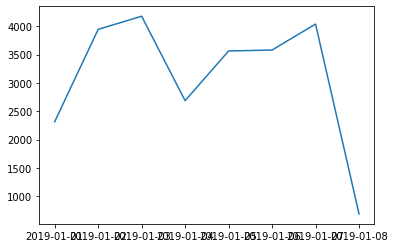

In [46]:
cmv_df['created_time'].dt.date.value_counts().plot()

For relatively simple (but easily obtainable) data visualizations through the Pushshift API, we can check out the [Pushshift Reddit Search](https://redditsearch.io/).  

Sources from the chapter: 

